# Assignment 1

First we need to import a few modules:

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [3]:
def f(x):
    '''Function equivalent to cos(x)'''
    cos = numpy.cos(x)
    return cos
    raise NotImplementedError()

You can use the following cell to check that your code works for scalar arguments:

In [4]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [5]:
xs=numpy.arange(start=0.1,stop=0.7,step=0.1)
assert numpy.isclose(f(xs),[0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256,       0.82533561]).all()

Define the analytic derivative of the function here (again, it should work both for single numbers and numpy arrays).

In [6]:
def df_analytic(x):
    ''' The analytic derivative '''
    derivative = -numpy.sin(x)
    return derivative
    raise NotImplementedError()

In [7]:
assert numpy.isclose(df_analytic(0.5),-0.4794255386)

In [8]:
xs=numpy.arange(start=0.1,stop=0.7,step=0.1)
assert numpy.isclose(
    df_analytic(xs),
    [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
).all()

Now define the numerical derivative using the backward difference method.

In [9]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f. 
    '''
    derivative = (f(x)-(f(x-dx)))/dx
    return derivative
    raise NotImplementedError()

In [10]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find in the assignment "Plotting" at:

https://dmaitre.phyip3.dur.ac.uk/notebooks/l1python


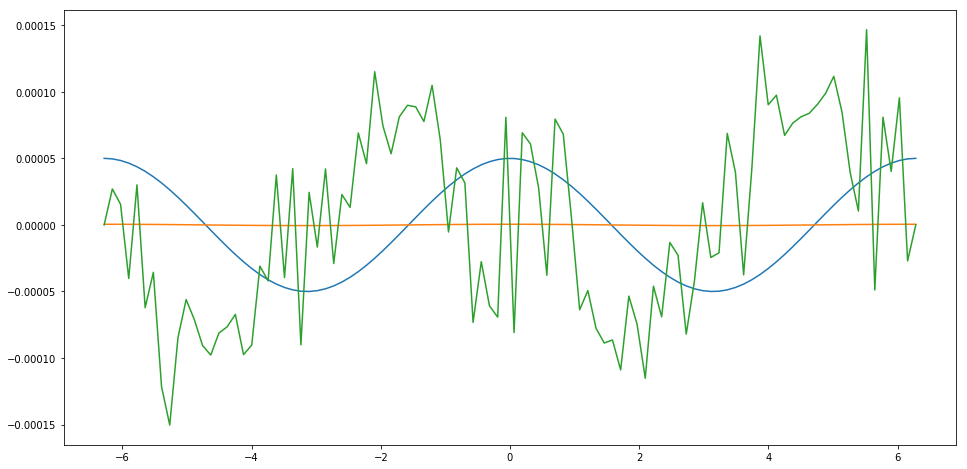

In [17]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(16, 8))
plt.plot(xs, df_dx_1 - df_dx_analytical)
plt.plot(xs, df_dx_2 - df_dx_analytical)
plt.plot(xs, df_dx_3 - df_dx_analytical)

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large.


The error estimate for the analytic derivative is roughly proportional to Δx, so making Δx smaller generally reduces the error. You can't make it too small though, because numbers in Python are stored in the form +- m*2^e, where 1<m<2. In decimal terms, this means that the computer only has a precision of up to 5 digits and little more. Operations with small numbers like 10^-12 are going to carry that approximation and since the small difference to the number amounts to a higher proportion of the latter we get a very wobbly "line".